In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/34 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N20.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N1.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/49 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N15.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/No18.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/31 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 6.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/3 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 5.jpeg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/no 1.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/26 no.jpg
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N26.JPG
/kaggle/input/brain-mri-images-for-brain-tumor-detection/no/N5.jpg
/kaggle/input/brain-mri-images-for-b

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random as rd
import os
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.metrics import accuracy
from keras.applications.vgg16 import VGG16
from numpy.random import seed

In [3]:
seed(25)
tf.random.set_seed(50)

# DOWNLOADING THE IMAGES

In [4]:
data=[]
paths=[]
labels=[]
for r,d,f in os.walk("/kaggle/input/brain-mri-images-for-brain-tumor-detection/brain_tumor_dataset/yes"):
    for file in f:
        if ".jpg" in file:
            paths.append(os.path.join(r,file))
            

In [5]:
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(1)
                   

In [6]:
paths = []
for r, d, f in os.walk(r"../input/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        labels.append(0)
        
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [7]:
labels=np.array(labels)
labels=labels.reshape(139,1)
print('data shape is:', data.shape)
print('labels shape is:', labels.shape)

data shape is: (139, 128, 128, 3)
labels shape is: (139, 1)


In [8]:
print(np.max(data))
print(np.min(data))

255
0


In [9]:
data=data/255.00
print(np.max(data))
print(np.min(data))

1.0
0.0


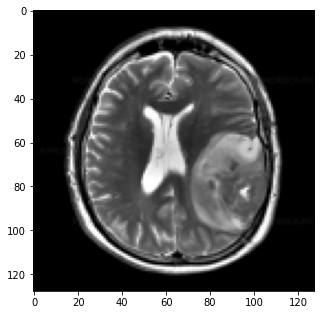

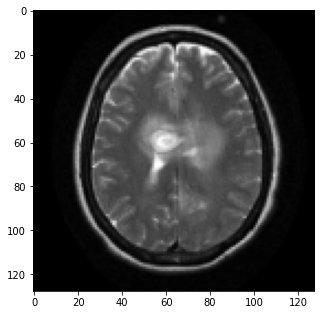

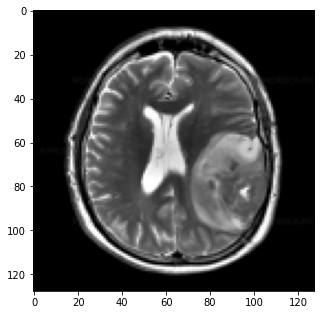

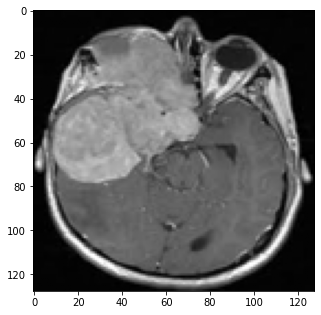

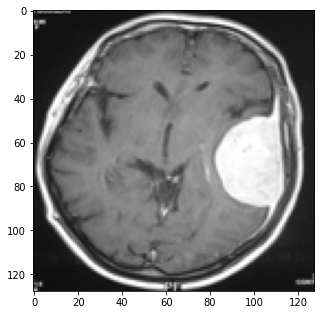

In [10]:
for i in range(5):
    fig=plt.figure(figsize=(30,30))
    plt.subplot(5,5,i+1)
    img=plt.imshow(data[i])
    plt.show(img)

In [11]:
model=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(5,5),padding="same",activation='relu',input_shape=[128,128,3]),
    layers.MaxPool2D(),
    layers.Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(units=256,activation='relu'),
    layers.Dense(units=1,activation="sigmoid")
])

2022-11-26 18:11:53.275571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 18:11:53.276695: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 18:11:53.515858: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 18:11:53.516814: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-26 18:11:53.517547: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

#including early stopping to prevent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

In [14]:
x_train,x_test,y_train,y_test = train_test_split(data, labels, test_size=0.3, shuffle=True, random_state=7)

In [15]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

2022-11-26 18:11:58.663742: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-11-26 18:12:01.062507: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


2/2 - 14s - loss: 0.6872 - accuracy: 0.5361 - val_loss: 0.6983 - val_accuracy: 0.4286
Epoch 2/200
2/2 - 0s - loss: 0.6856 - accuracy: 0.5361 - val_loss: 0.6965 - val_accuracy: 0.4286
Epoch 3/200
2/2 - 0s - loss: 0.6832 - accuracy: 0.5361 - val_loss: 0.6942 - val_accuracy: 0.4286
Epoch 4/200
2/2 - 0s - loss: 0.6805 - accuracy: 0.5361 - val_loss: 0.6916 - val_accuracy: 0.4286
Epoch 5/200
2/2 - 0s - loss: 0.6775 - accuracy: 0.5361 - val_loss: 0.6887 - val_accuracy: 0.4286
Epoch 6/200
2/2 - 0s - loss: 0.6746 - accuracy: 0.5361 - val_loss: 0.6857 - val_accuracy: 0.4286
Epoch 7/200
2/2 - 0s - loss: 0.6712 - accuracy: 0.5361 - val_loss: 0.6830 - val_accuracy: 0.4286
Epoch 8/200
2/2 - 0s - loss: 0.6675 - accuracy: 0.5361 - val_loss: 0.6799 - val_accuracy: 0.4286
Epoch 9/200
2/2 - 0s - loss: 0.6640 - accuracy: 0.5361 - val_loss: 0.6761 - val_accuracy: 0.4286
Epoch 10/200
2/2 - 0s - loss: 0.6605 - accuracy: 0.5361 - val_loss: 0.6725 - val_accuracy: 0.4286
Epoch 11/200
2/2 - 0s - loss: 0.6568 - a

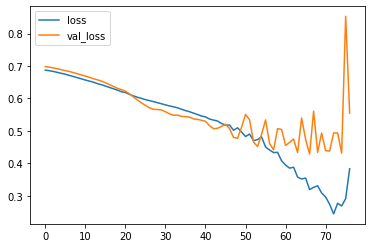

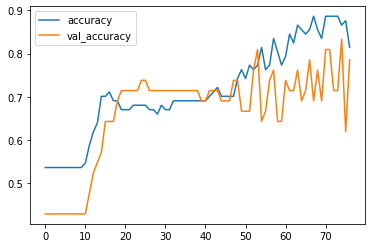

In [16]:
history_frame=pd.DataFrame(history.history)
history_frame
history_frame.loc[:,["loss","val_loss"]].plot()
history_frame.loc[:,["accuracy","val_accuracy"]].plot();


In [17]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

In [18]:
classification_report(y_test,pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.83      0.82        24\n           1       0.76      0.72      0.74        18\n\n    accuracy                           0.79        42\n   macro avg       0.78      0.78      0.78        42\nweighted avg       0.78      0.79      0.78        42\n'

In [19]:
vgg16_weight_path ='../input/keras-pretrained-models/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [20]:
base_model=VGG16(include_top=False,weights='imagenet',input_shape=(128,128,3))

58900480/58889256 [==============================] - 0s 0us/step


In [21]:
model = keras.Sequential([
    
    preprocessing.RandomFlip('horizontal'), # flip left-to-right
    
    base_model, #vgg16
    
    layers.Flatten(),
    layers.Dropout(.25),
    layers.Dense(units=256, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])

In [22]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(epsilon=0.01),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [23]:
#including early stopping to revent overfitting
early_stopping = keras.callbacks.EarlyStopping(
    patience=40,
    min_delta=0.001,
    restore_best_weights=True,
)

In [24]:
history = model.fit(
    x = x_train,
    y = y_train,
    validation_data= (x_test,y_test),
    batch_size = 64,
    epochs=200,
    callbacks=[early_stopping],
    verbose=(2),
)

Epoch 1/200
2/2 - 17s - loss: 0.7343 - accuracy: 0.5258 - val_loss: 0.5965 - val_accuracy: 0.5714
Epoch 2/200
2/2 - 0s - loss: 0.6528 - accuracy: 0.6289 - val_loss: 0.5949 - val_accuracy: 0.5952
Epoch 3/200
2/2 - 0s - loss: 0.5711 - accuracy: 0.6804 - val_loss: 0.4525 - val_accuracy: 0.8333
Epoch 4/200
2/2 - 0s - loss: 0.4970 - accuracy: 0.8041 - val_loss: 0.4103 - val_accuracy: 0.8571
Epoch 5/200
2/2 - 0s - loss: 0.4561 - accuracy: 0.7835 - val_loss: 0.3943 - val_accuracy: 0.8571
Epoch 6/200
2/2 - 0s - loss: 0.3880 - accuracy: 0.8454 - val_loss: 0.3403 - val_accuracy: 0.8571
Epoch 7/200
2/2 - 0s - loss: 0.3343 - accuracy: 0.8144 - val_loss: 0.2260 - val_accuracy: 0.9524
Epoch 8/200
2/2 - 0s - loss: 0.3380 - accuracy: 0.8763 - val_loss: 0.6169 - val_accuracy: 0.6905
Epoch 9/200
2/2 - 0s - loss: 0.7029 - accuracy: 0.7423 - val_loss: 0.7369 - val_accuracy: 0.5952
Epoch 10/200
2/2 - 0s - loss: 0.4167 - accuracy: 0.8247 - val_loss: 0.2910 - val_accuracy: 0.8571
Epoch 11/200
2/2 - 0s - loss

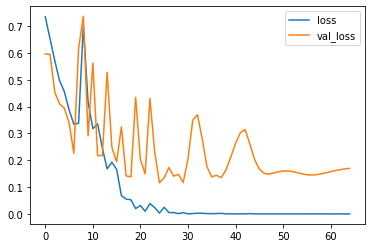

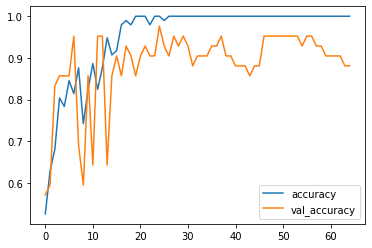

In [25]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss','val_loss']].plot()
history_frame.loc[:, ['accuracy','val_accuracy']].plot();

In [26]:
pred = model.predict(x_test)

for i in range(len(pred)):
    if pred[i] > 0.5:
        pred[i] = 1
    else:
        pred[i] = 0

pred = pred.astype(int)

In [27]:
classification_report(y_test, pred)

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        24\n           1       1.00      0.94      0.97        18\n\n    accuracy                           0.98        42\n   macro avg       0.98      0.97      0.98        42\nweighted avg       0.98      0.98      0.98        42\n'